# **Linjär Regression med Scikit-learn: En Nybörjarguide**
---

Linjär regression är en grundläggande statistisk och maskininlärningsmetod som används för att förutsäga ett kontinuerligt utfall baserat på en eller flera prediktorvariabler. I denna guide kommer vi att utforska hur man implementerar linjär regression med Scikit-learn.

### *Vad är Linjär Regression?*

*Linjär regression* försöker modellera förhållandet mellan två variabler genom att passa en linjär ekvation till observerad data. 
</br>En variabel anses vara en förklarande variabel (oberoende variabel), och den andra anses vara en beroende variabel.

Den grundläggande idén är att hitta den bästa raka linjen som passar datan.

---

*Låt oss börja med att importera de nödvändiga biblioteken och skapa lite exempel-data.*

### 1. Importera bibliotek

In [3]:
# Importera nödvändiga bibliotek
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

- ***numpy***: För att hantera och manipulera numeriska data.
- ***matplotlib.pyplot***: För att skapa grafer och visualiseringar.
- ***train_test_split***: Används för att dela upp datasetet i tränings- och testdata.
- ***LinearRegression***: Scikit-learns inbyggda linjära regressionsmodell.
- ***mean_squared_error***: För att utvärdera modellens prestanda.
- ***fetch_california_housing***: Ett inbyggt dataset i Scikit-learn för bostadspriser i Kalifornien.

### 2. Ladda datasetet

In [4]:
# ladda dataset
data = fetch_california_housing()

# se data och deras beskrivning
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### 3. Dela data i funktioner och mål

Datasetet består av flera funktioner (features) som beskriver bostäder och ett mål (target) som representerar medianvärdet av bostadspriser i olika områden. Vi delar upp dessa för att träna modellen.

In [5]:
# Dela upp data i funktioner (X) och målvariabel (y)
X = data.data  # Funktioner som beskriver bostäder
y = data.target  # Målvariabel (bostadspris)

# Visa storleken på X och y
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (20640, 8), y shape: (20640,)


- X är funktionerna (t.ex. antal rum, inkomst i området osv.)
- y är bostadspriserna som vi vill förutsäga.

### 4. Dela upp data i tränings- och testset

För att träna modellen använder vi en del av data (träningsdata) och sparar resten (testdata) för att utvärdera hur väl modellen presterar på osedda data.

In [6]:
# Dela upp data i träningsset (80%) och testset (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visa storleken på tränings- och testdata
print(f"Träningsdata: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testdata: X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Träningsdata: X_train shape: (16512, 8), y_train shape: (16512,)
Testdata: X_test shape: (4128, 8), y_test shape: (4128,)


### 5. Skapa och träna linjär regressionsmodell

Nu skapar vi en linjär regressionsmodell och tränar den med hjälp av vårt träningsdata

In [7]:
# Skapa en linjär regressionsmodell
model = LinearRegression()

# Träna modellen på träningsdata
model.fit(X_train, y_train)

# Visa modellens koefficienter och intercept
print(f"Modellens koefficienter: {model.coef_}")
print(f"Modellens intercept: {model.intercept_}")

Modellens koefficienter: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Modellens intercept: -37.02327770606397


- ***model.coef_***: Visar vikterna för varje funktion i linjära modellen.
- ***model.intercept_***: Är modellens intercept, alltså där linjen korsar y-axeln.

### 6. Gör förutsägelser på testset

Nu när modellen är tränad kan vi använda den för att göra förutsägelser på testsetet och se hur väl den presterar.

In [8]:
# Gör förutsägelser på testdata
y_pred = model.predict(X_test)

# Visa de första 5 förutsägelserna jämfört med de faktiska bostadspriserna
print(f"Faktiska priser: {y_test[:5]}")
print(f"Förutsagda priser: {y_pred[:5]}")

Faktiska priser: [0.477   0.458   5.00001 2.186   2.78   ]
Förutsagda priser: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


### 7. Utvärdera modellen

Vi använder Mean Squared Error (MSE) för att mäta hur nära förutsägelserna är de faktiska värdena.

In [9]:
# Beräkna Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.5558915986952425


### 8. Visualisera resultatet

Om du vill kan du skapa en graf som visar hur de förutsagda värdena jämför sig med de faktiska värdena

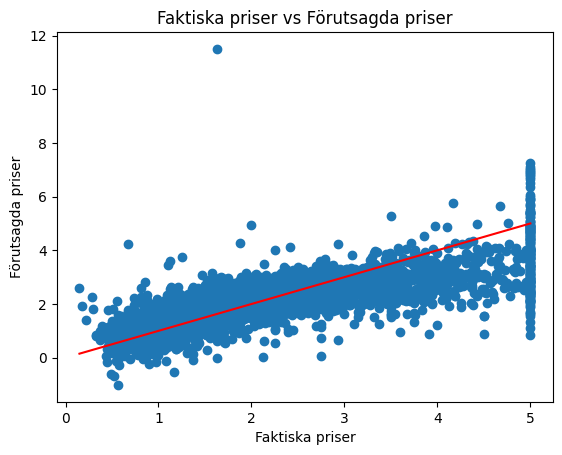

In [10]:
# Skapa en scatter-plot för att visa förutsagda värden vs faktiska värden
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal linje
plt.xlabel('Faktiska priser')
plt.ylabel('Förutsagda priser')
plt.title('Faktiska priser vs Förutsagda priser')
plt.show()

### Sammanfattning:

Vi använt en linjär regressionsmodell med hjälp av Scikit-learn för att förutsäga bostadspriser. Vi delade upp data i tränings- och testset, tränade modellen och utvärderade dess prestanda med hjälp av MSE. Linjär regression är en enkel men kraftfull metod för att modellera linjära förhållanden mellan variabler